In [1]:
'''
tp = TextProcessor
# is, ASAP !!!!
df = tp.apply_contractions(df, col)
# is, AS SOON AS POSSIBLE !!!!
df = tp.remove_nonAlphanumeric(df, col)
# is  AS SOON AS POSSIBLE
df = tp.to_lower(df, col)
# is  as soon as possible
df = tp.apply_lemmatization(df, col)
# be  as soon as possible
df = tp.remove_extra_spaces(df, col)
# be as soon as possible
# '''

# features + spacyNLP + rating + tense + scaled(length) + absolute_sentiment

'\ntp = TextProcessor\n# is, ASAP !!!!\ndf = tp.apply_contractions(df, col)\n# is, AS SOON AS POSSIBLE !!!!\ndf = tp.remove_nonAlphanumeric(df, col)\n# is  AS SOON AS POSSIBLE\ndf = tp.to_lower(df, col)\n# is  as soon as possible\ndf = tp.apply_lemmatization(df, col)\n# be  as soon as possible\ndf = tp.remove_extra_spaces(df, col)\n# be as soon as possible\n# '

In [2]:
from utils import DataLoader, Metrics 
from classifiers import RandomForest, DecisionTree, LSVM, AdaBoost, XGBoost

In [3]:
data = DataLoader()
X_train, X_test, y_train, y_test = data.datasets

In [4]:
X_train[0].shape

(305,)

========================= DecisionTree =========================
Elapsed Time: 59.3171 seconds
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50)
Train Accuracy: 0.6108, F1: [0.6397 0.3222 0.6656 0.6995]
Test  Accuracy: 0.5596, F1: [0.6457 0.3385 0.5435 0.6078]


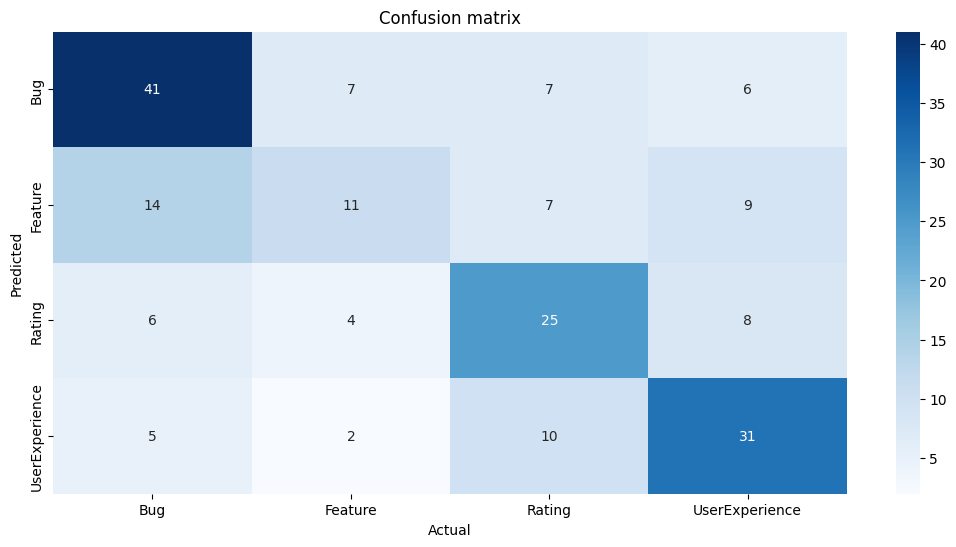

========================= LSVM =========================
Elapsed Time: 118.0985 seconds
LinearSVC(C=0.1, dual=False, penalty='l1')
Train Accuracy: 0.7674, F1: [0.7739 0.6256 0.8045 0.817 ]
Test  Accuracy: 0.6425, F1: [0.7023 0.5753 0.6076 0.6408]


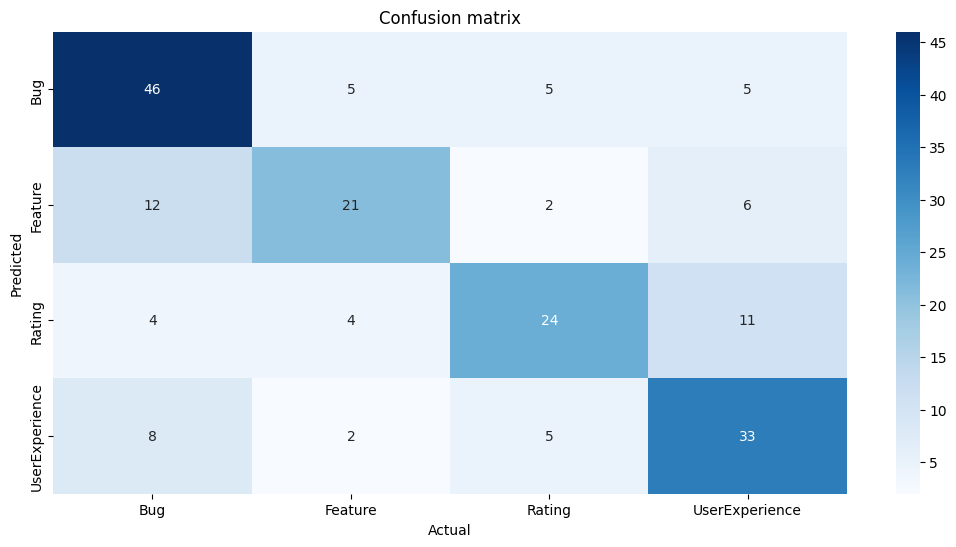

========================= RandomForest =========================
Elapsed Time: 146.5707 seconds
RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_leaf=4,
                       min_samples_split=18, n_estimators=600)
Train Accuracy: 0.9597, F1: [0.9682 0.9802 0.9472 0.9468]
Test  Accuracy: 0.5648, F1: [0.637  0.3103 0.5556 0.6214]


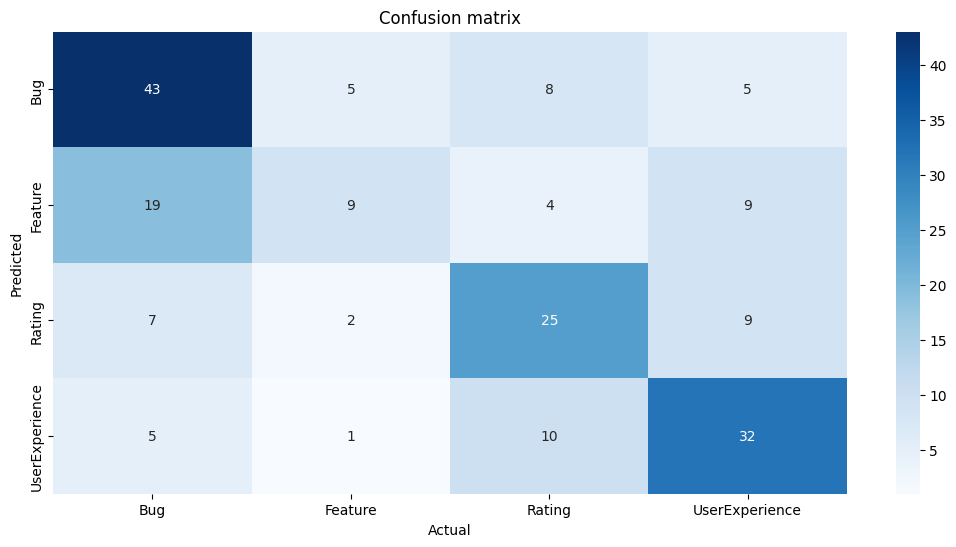

========================= AdaBoost =========================
Elapsed Time: 58.9069 seconds
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=10))
Train Accuracy: 0.9991, F1: [0.9983 1.     1.     0.9982]
Test  Accuracy: 0.5596, F1: [0.6349 0.4474 0.5    0.6   ]


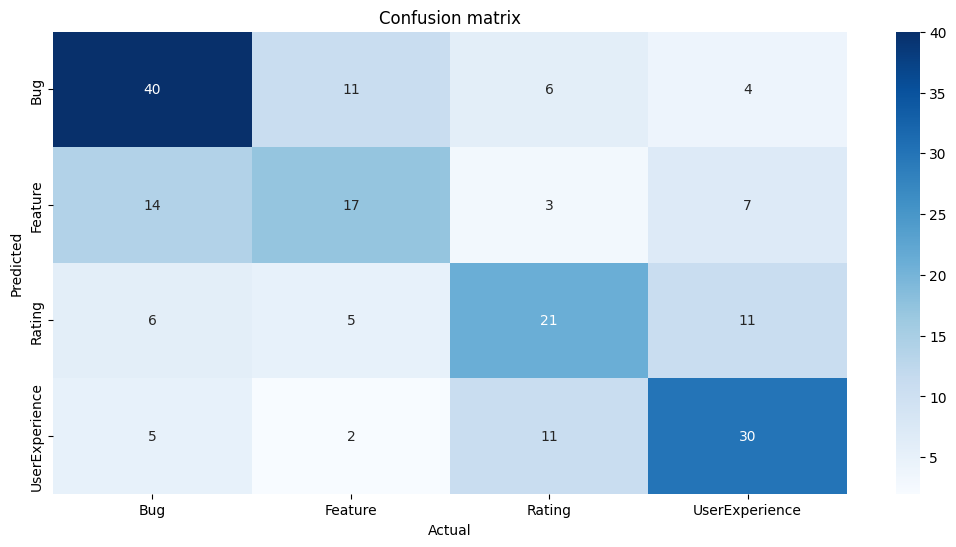

========================= XGBoost =========================
Elapsed Time: 347.689 seconds
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7963989829046262, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.29783180144888993, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3048127001951816, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=143, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
Train Accuracy: 0.9982, F1: [0.9983 1.     0.9983 0.9964]
Test  Accuracy: 0.6062, F1: [0.6512 0.4348 0.6136 0.66  ]


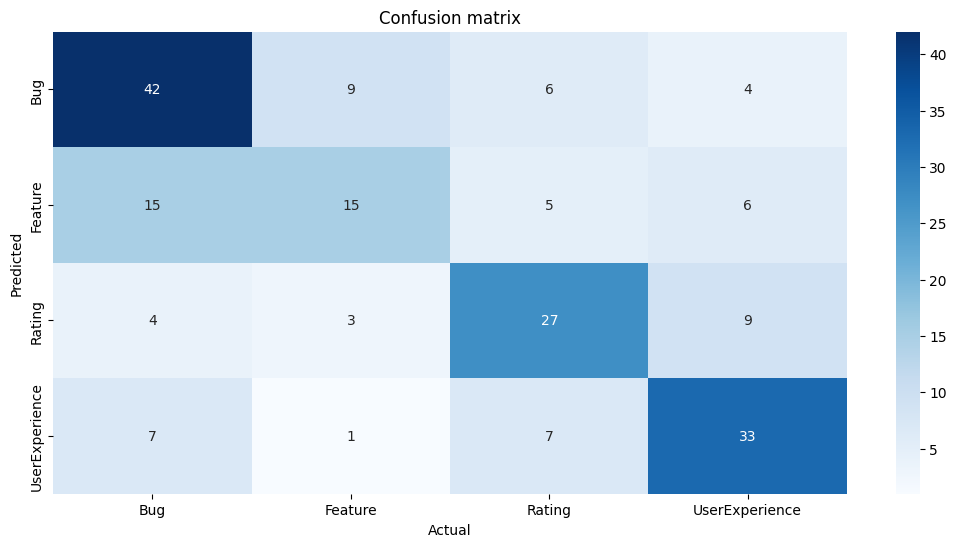

In [5]:
clfs = [DecisionTree, LSVM, RandomForest, AdaBoost, XGBoost]

for clf in clfs:
    print(f"========================= {clf.__name__} =========================")
    model = clf()
    model.model_selection(X_train, y_train)
    print(model.clf)

    Metrics.report(model, X_train, X_test, y_train, y_test)
    pred = model.predict(X_test)
    Metrics.plot_confusion_matrix(y_test, pred, data.labels)